# Example 3 of the "The GMT/MATLAB Toolbox" Wessel P & J. Luis. 
DOI 10.1002/2016GC006723

# Data Conversion

Our third example illustrates reading in satellite measurements of sea surface temperature stored as several individual arrays inside a single HDF5 data set. We read these separate arrays, exclude low-quality data points, grid the data stored in satellite sensor coordinates using a nearest neighbor algorithm, and mask the grid away from the data constraints. Finally, we generate and display a PNG illustration as well as a PDF to show the image quality in all of its explendor.

Import sea surface temperature grids from several HDF5 layers

In [3]:
using GMT
file = "A2016152023000.L2_LAC_SST.nc=gd?HDF5:\"A2016152023000.L2_LAC_SST.nc\"";
sst  = gmt("read -Tg " * file * "://geophysical_data/sst");
qual = gmt("read -Tg " * file * "://geophysical_data/qual_sst");
lat  = gmt("read -Tg " * file * "://navigation_data/latitude");
lon  = gmt("read -Tg " * file * "://navigation_data/longitude");

Retain only the data points of best quality (where quality flags are == 0)

In [5]:
qual = qual.z .== 0;
sst = sst.z[qual];
lon = lon.z[qual];
lat = lat.z[qual];

Perform nearest neighbor gridding

In [6]:
G = gmt("nearneighbor -R-12/-1/33/43 -I0.01 -S0.05", [lon lat sst]);

Create a mask that is NaN where no data exist

In [7]:
mask = gmt("grdmask -R -I0.01 -NNaN/1/1 -S0.02", [lon lat]);

Apply the mask to limit the plot that follows

In [8]:
G.z = G.z .* mask.z;

Select color table and make illustrations

In [9]:
cpt_s = gmt("grd2cpt -Cjet -E -M --COLOR_NAN=255", G);
cpt_t = gmt("makecpt -Celevation -T0/3000");
gmt("grdimage -JM15c -C -Ba -BWSne -P -K > WL_example_3.ps", G, cpt_s);

Clip topography to only plot over land, using shading

In [10]:
arg = "-TdjTR+w3c+o1c+f3+l --FONT_TITLE=12 --MAP_TITLE_OFFSET=5p ";
gmt("pscoast -Di -Gc -A1000 -J -R -O -K >> WL_example_3.ps");
int = gmt("grdgradient -R etopo1m.nc -A0 -Nt0.7");
gmt("grdimage -R -J -O -K -C etopo1m.nc -I -t50 >> WL_example_3.ps", cpt_t, int);
gmt("pscoast -Q -O -K >> WL_example_3.ps");
gmt("pscoast -Di -W0.5p -A1000 -N1/0.5p -J -R " * arg * " -O -K >> WL_example_3.ps");
gmt("psscale -R -J -C -DJBC+w14c/0.25c+o0/1c+h+ef -Baf+u\" m\" -O -K >> WL_example_3.ps", cpt_t);
gmt("psscale -R -J -C -DJTC+w14c/0.25c+o0/1c+h -Ba1f+u\\232 -O >> WL_example_3.ps", cpt_s);

In [13]:
gmt("psconvert -Tef -P -A WL_example_3.ps");

Create a PNG image and display it here (image quality is far better than this low res figure)

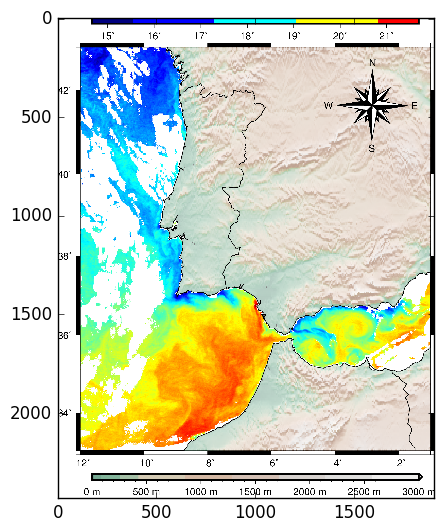

PyObject <matplotlib.image.AxesImage object at 0x0000000028DE23C8>

In [20]:
using PyPlot
img = imread("WL_example_3.png");
imshow(img)

Now create a PDF image with the result in its highest quality

In [17]:
gmt("psconvert -Tef -P -A WL_example_3.ps");

which you can load from https://github.com/joa-quim/GMT.jl/blob/master/WL_example_3.pdf